In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

In [ ]:
pip install imblearn

In [ ]:
df1 = pd.read_csv('Taiwain_integrated_da.csv')

In [ ]:
df2 = pd.read_csv('USA_integrated_data.csv')

In [ ]:
df2.shape

(92845, 15)

In [ ]:
df1.shape

(6819, 13)

In [ ]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.942388,0.216602,0.010451,0.493687,0.848030,0.027064,0.103448,0.998992,0.840359,-0.075697,7.070000e+09,0.022138,0.0
6815,0.892640,0.216697,0.009259,0.475162,0.848037,0.027009,0.103448,0.998992,0.840306,-0.300213,5.220000e+09,0.022159,0.0
6816,0.904986,0.210929,0.025836,0.472725,0.847978,0.026791,0.106447,0.998984,0.840138,1.774027,5.990000e+09,0.022068,0.0
6817,0.919319,0.228326,0.012782,0.506264,0.847980,0.026822,0.109445,0.999018,0.841084,0.126140,7.250000e+09,0.022138,0.0


#### Integration

In [ ]:
df1.shape

(6819, 13)

In [ ]:
df1.columns

Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [ ]:
df2.shape

(92845, 15)

In [ ]:
df2.columns

Index(['Data Year - Fiscal', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK'],
      dtype='object')

In [ ]:
df2.drop(['Data Year - Fiscal','Employee Growth'],axis=1,inplace=True)

In [ ]:
df2.columns


Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [ ]:
df = pd.concat([df1,df2],axis=0)

In [ ]:
df

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,1.345005,0.174115,-0.326823,-0.283168,-1.846719,-7.328654e-02,0.327312,0.0
92841,1.988495,-1.807630,0.093838,-1.204734,-0.121122,1.345005,0.215844,-0.270563,-0.283168,-2.474549,-2.018347e-01,-0.010544,0.0
92842,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.283168,347.810044,-1.680005e-01,-0.020206,0.0
92843,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,7.693645e-02,-0.170928,0.0


In [ ]:
df.shape

(99664, 13)

In [ ]:
df.describe()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
count,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,99664.000000,9.966400e+04,99664.000000,99664.000000
mean,1.612494,0.324062,0.214523,-0.057494,0.079099,0.472013,0.806954,0.079340,0.033700,127.377951,4.502603e+08,0.101025,0.007806
std,0.692242,1.047929,0.245699,0.584135,0.244843,0.570701,0.598846,0.303758,0.255840,153.948162,1.694453e+09,0.178613,0.088008
min,0.009283,-2.530000,-0.460000,-2.090000,-0.314959,-1.230000,-0.490000,-0.395000,-0.304856,-332.010000,-4.105072e-01,-0.389922,0.000000
25%,1.050000,-0.320000,0.025836,-0.520000,-0.051681,0.020000,0.290000,-0.070000,-0.080000,9.060000,-1.635495e-02,0.000000,0.000000
50%,1.460000,0.180000,0.160000,0.100956,0.060000,0.280000,0.760000,0.060000,0.030000,57.060000,8.959122e-02,0.068350,0.000000
75%,2.195013,0.920000,0.370000,0.370000,0.130000,0.880000,1.170000,0.150000,0.070000,265.902500,2.324345e-01,0.249176,0.000000
max,3.806590,3.150000,0.900000,1.750000,0.848195,2.050000,2.464120,0.999053,0.844843,583.520000,9.990000e+09,0.558068,1.000000


In [ ]:
df['BK'].value_counts()

0.0    98886
1.0      778
Name: BK, dtype: int64

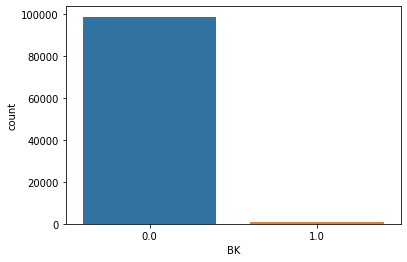

In [ ]:
sns.countplot(x='BK', data=df)

In [ ]:
#SMOTE

In [ ]:
X=df.drop(labels=['BK'], axis=1)
y=df['BK']


In [ ]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

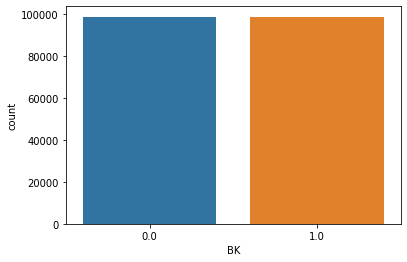

In [ ]:
sns.countplot(x=y)

In [ ]:
X.shape

(197772, 12)

In [ ]:
X

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,0.894010,0.225280,0.004081,0.461701,0.848049,0.026900,0.147565,0.999021,0.840402,0.543002,5.241982e+09,0.022076
197768,2.003298,-2.166894,0.240290,-0.143453,-0.087216,-0.014069,1.242213,-0.086772,-0.283168,-1.429183,4.458864e-02,-0.292113
197769,1.579644,-0.041927,0.271487,-0.747601,-0.173982,0.257425,0.024370,-0.270563,-0.283168,360.066588,1.955775e-01,-0.139118
197770,0.931390,0.224922,0.005698,0.504669,0.848042,0.026709,0.136900,0.999027,0.840843,0.804348,5.904593e+09,0.022024


In [ ]:
##NOrmalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normal_scaling = MinMaxScaler()
normalized_data = normal_scaling.fit_transform(X)
normalized_data

array([[2.29391041e-01, 4.85706488e-01, 3.39896297e-01, ...,
        3.62765076e-01, 4.98498499e-01, 4.34629568e-01],
       [2.40434581e-01, 4.82208439e-01, 3.42658975e-01, ...,
        3.62832507e-01, 6.11611612e-01, 4.34606246e-01],
       [2.70648217e-01, 4.85145790e-01, 3.46722466e-01, ...,
        3.62670644e-01, 7.28728729e-01, 4.34667263e-01],
       ...,
       [4.13546006e-01, 4.38041020e-01, 5.37857977e-01, ...,
        7.55929995e-01, 6.06691429e-11, 2.64564366e-01],
       [2.42831831e-01, 4.85021562e-01, 3.42424979e-01, ...,
        3.63520963e-01, 5.91050391e-01, 4.34546852e-01],
       [3.14226831e-01, 3.46834869e-01, 3.74203876e-01, ...,
        3.81816529e-01, 4.48809659e-11, 4.48166963e-01]])

In [ ]:
normalized_data_df = pd.DataFrame(normalized_data,columns = df.columns[0:12])

<Figure size 3200x2240 with 0 Axes>

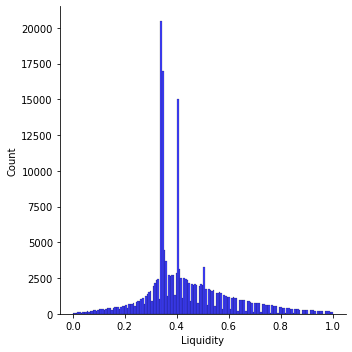

In [ ]:
plt.figure(figsize=(40,28),dpi=80)
sns.displot(normalized_data_df["Liquidity"], color = 'blue', label = "Tobin's Q",kde = False)

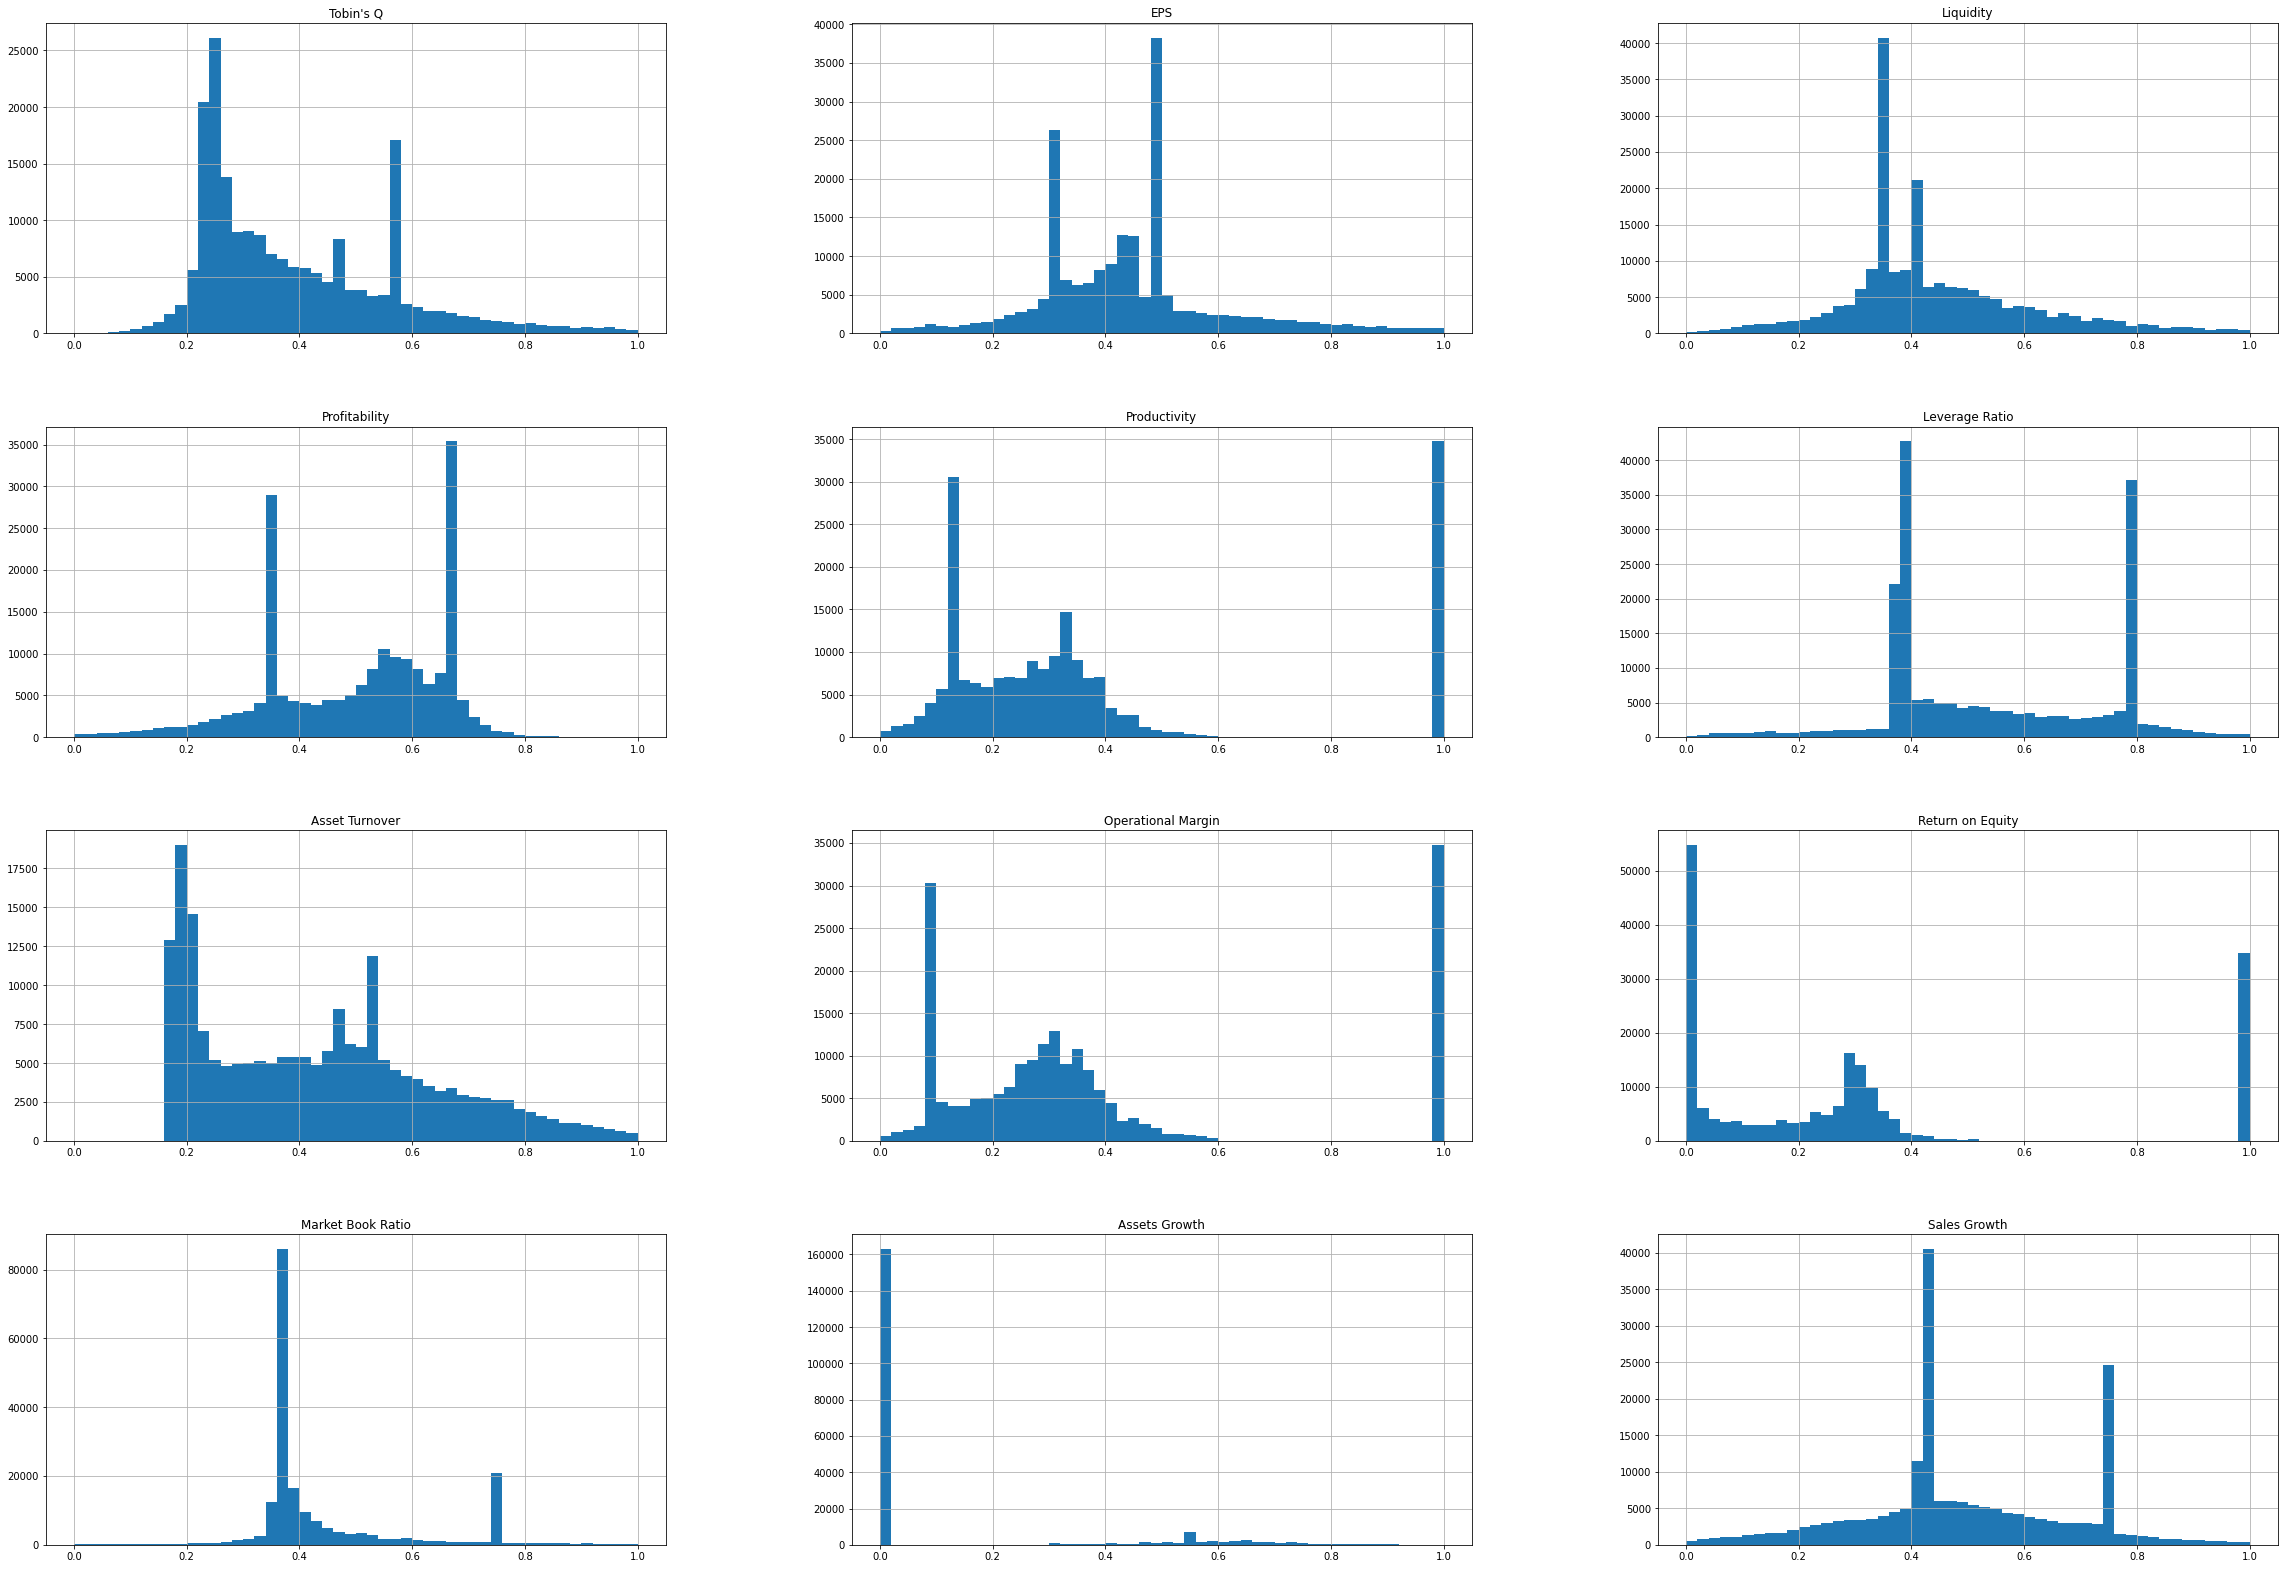

In [ ]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

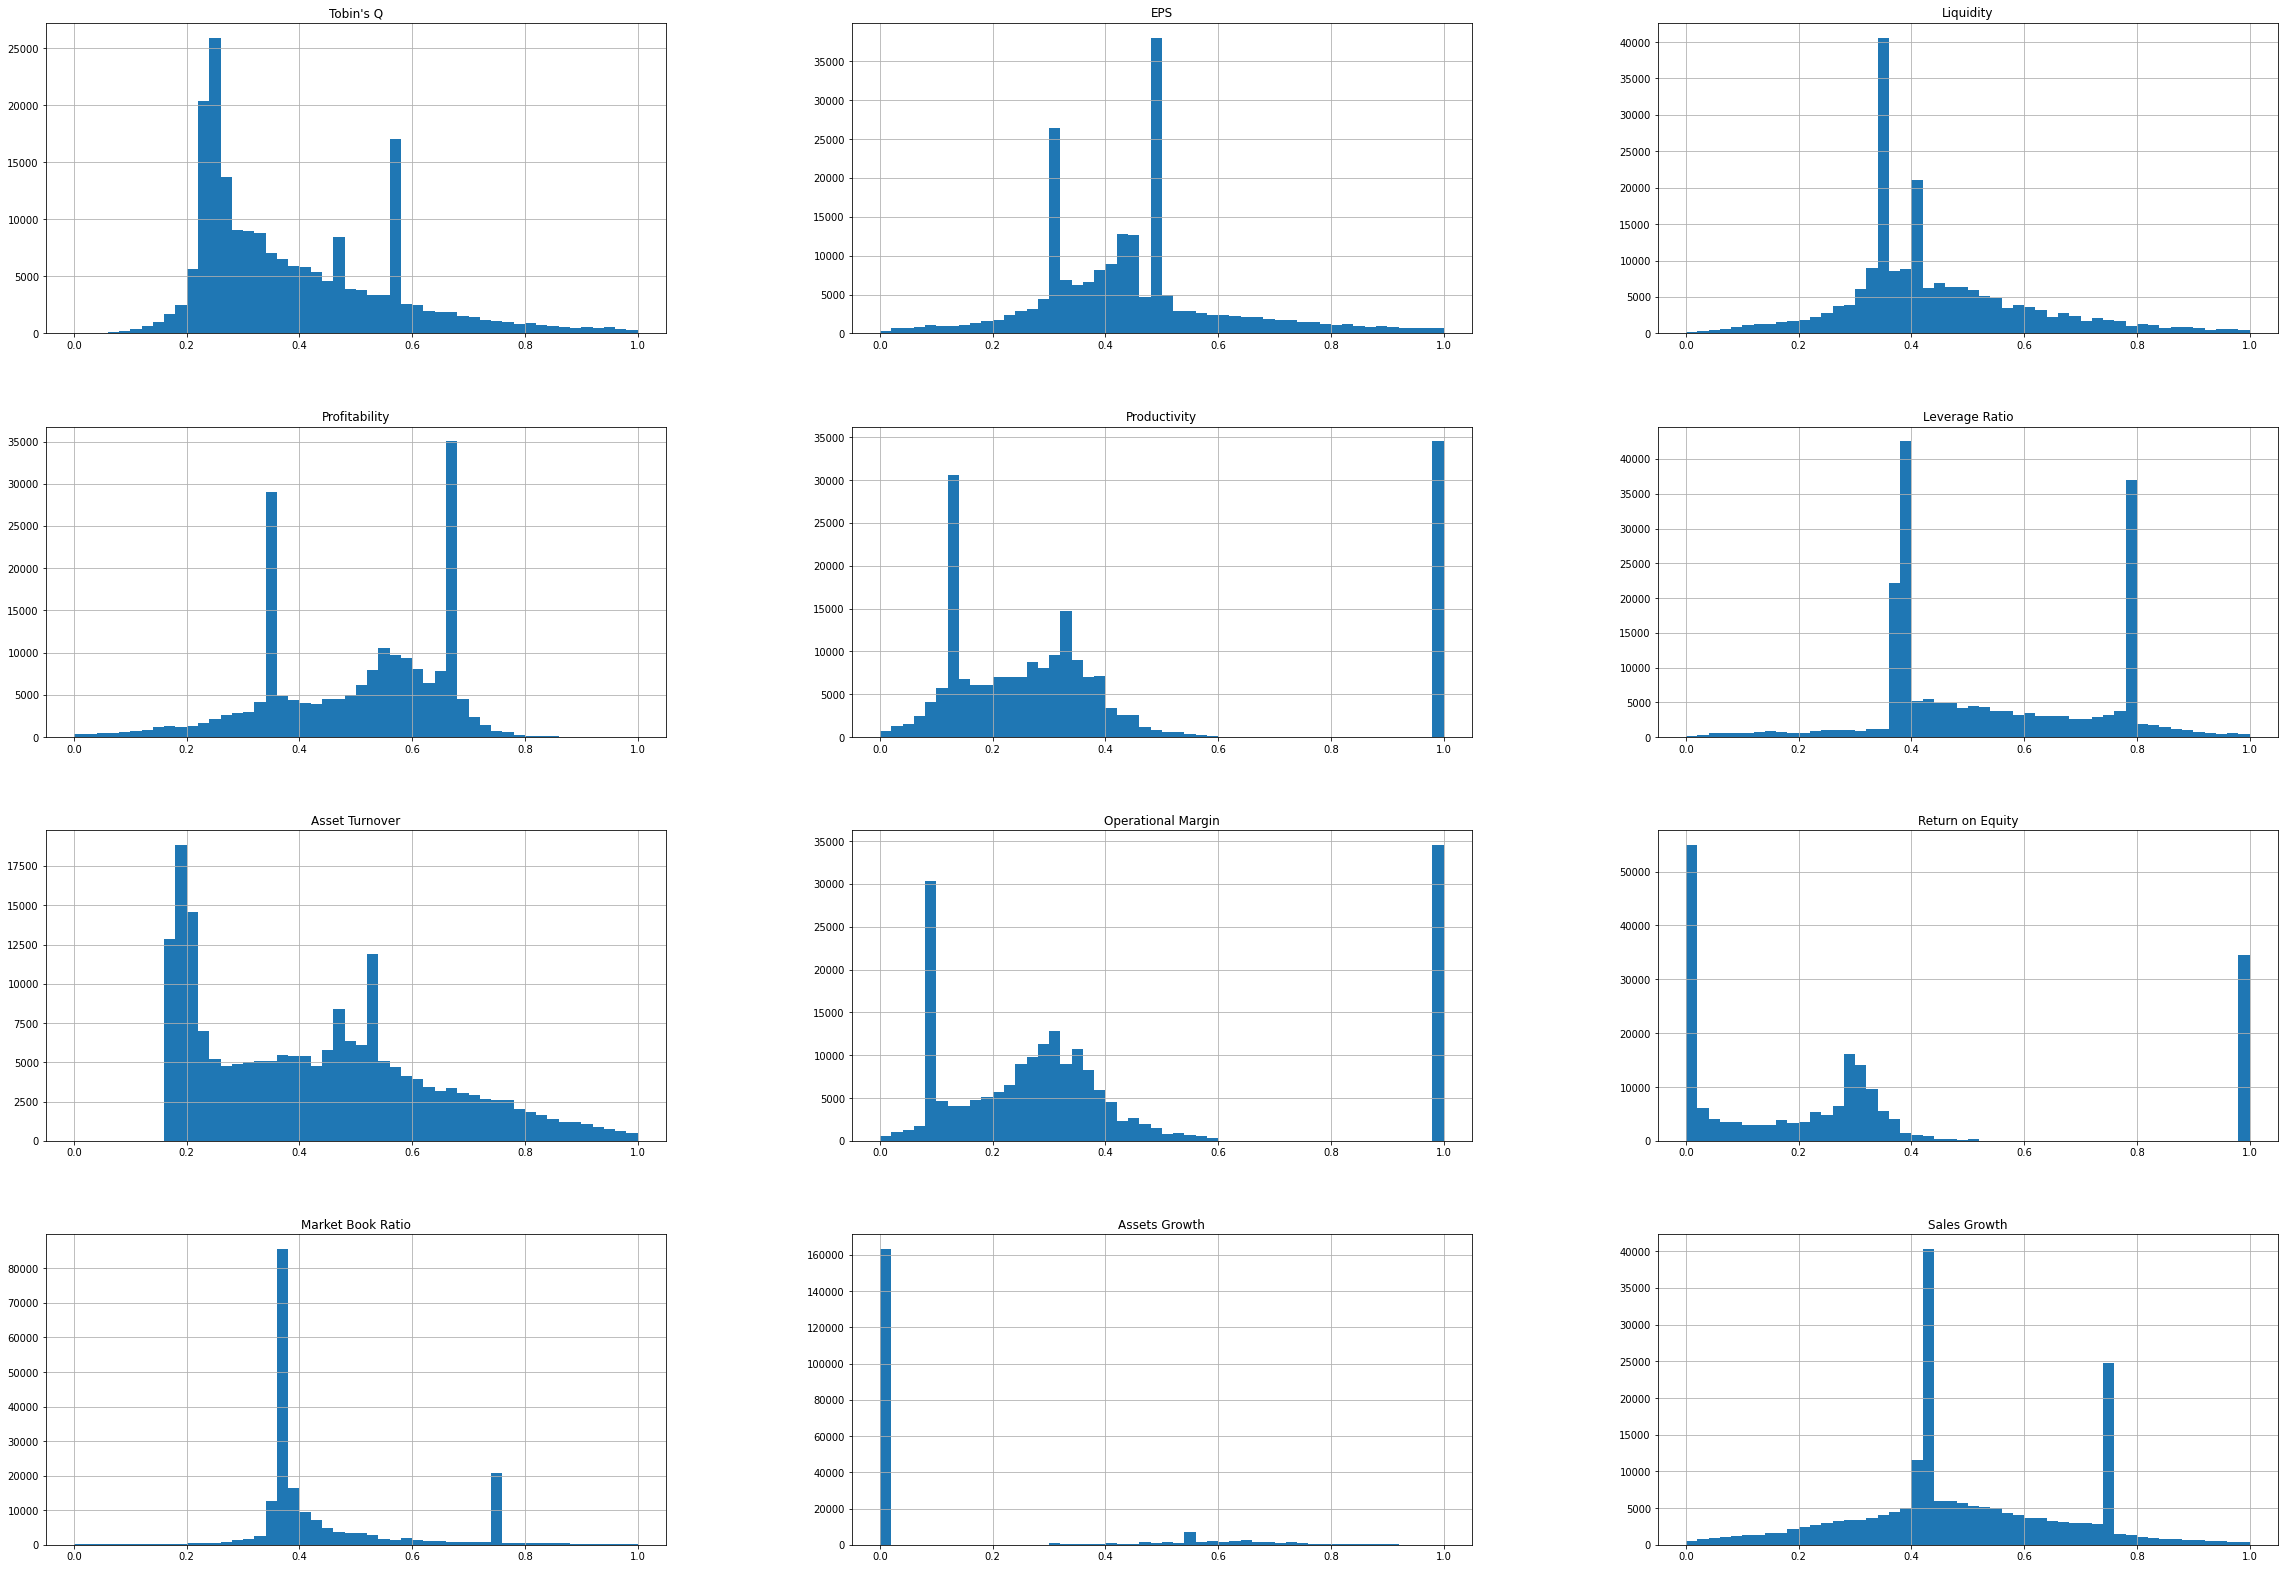

In [ ]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [ ]:
##Standardization

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.95296463,  0.26837834, -0.58151622, ..., -0.55306856,
         1.71074172, -0.32047309],
       [-0.88808218,  0.24699793, -0.5646704 , ..., -0.55261678,
         2.20097014, -0.32059677],
       [-0.71057254,  0.2649513 , -0.53989268, ..., -0.55370126,
         2.70855177, -0.32027318],
       ...,
       [ 0.12897339, -0.02295756,  0.62558343, ...,  2.08114579,
        -0.44973395, -1.22237045],
       [-0.87399798,  0.26419201, -0.56609722, ..., -0.5480041 ,
         2.1118585 , -0.32091175],
       [-0.45454165, -0.5804183 , -0.37232085, ..., -0.42542338,
        -0.44973395, -0.24868097]])

In [ ]:
X_scaled.std()

0.9999999999999999

In [ ]:
Standard_data_df = pd.DataFrame(X_scaled,columns = df.columns[0:12])

In [ ]:
Standard_data_df.shape

(197772, 12)

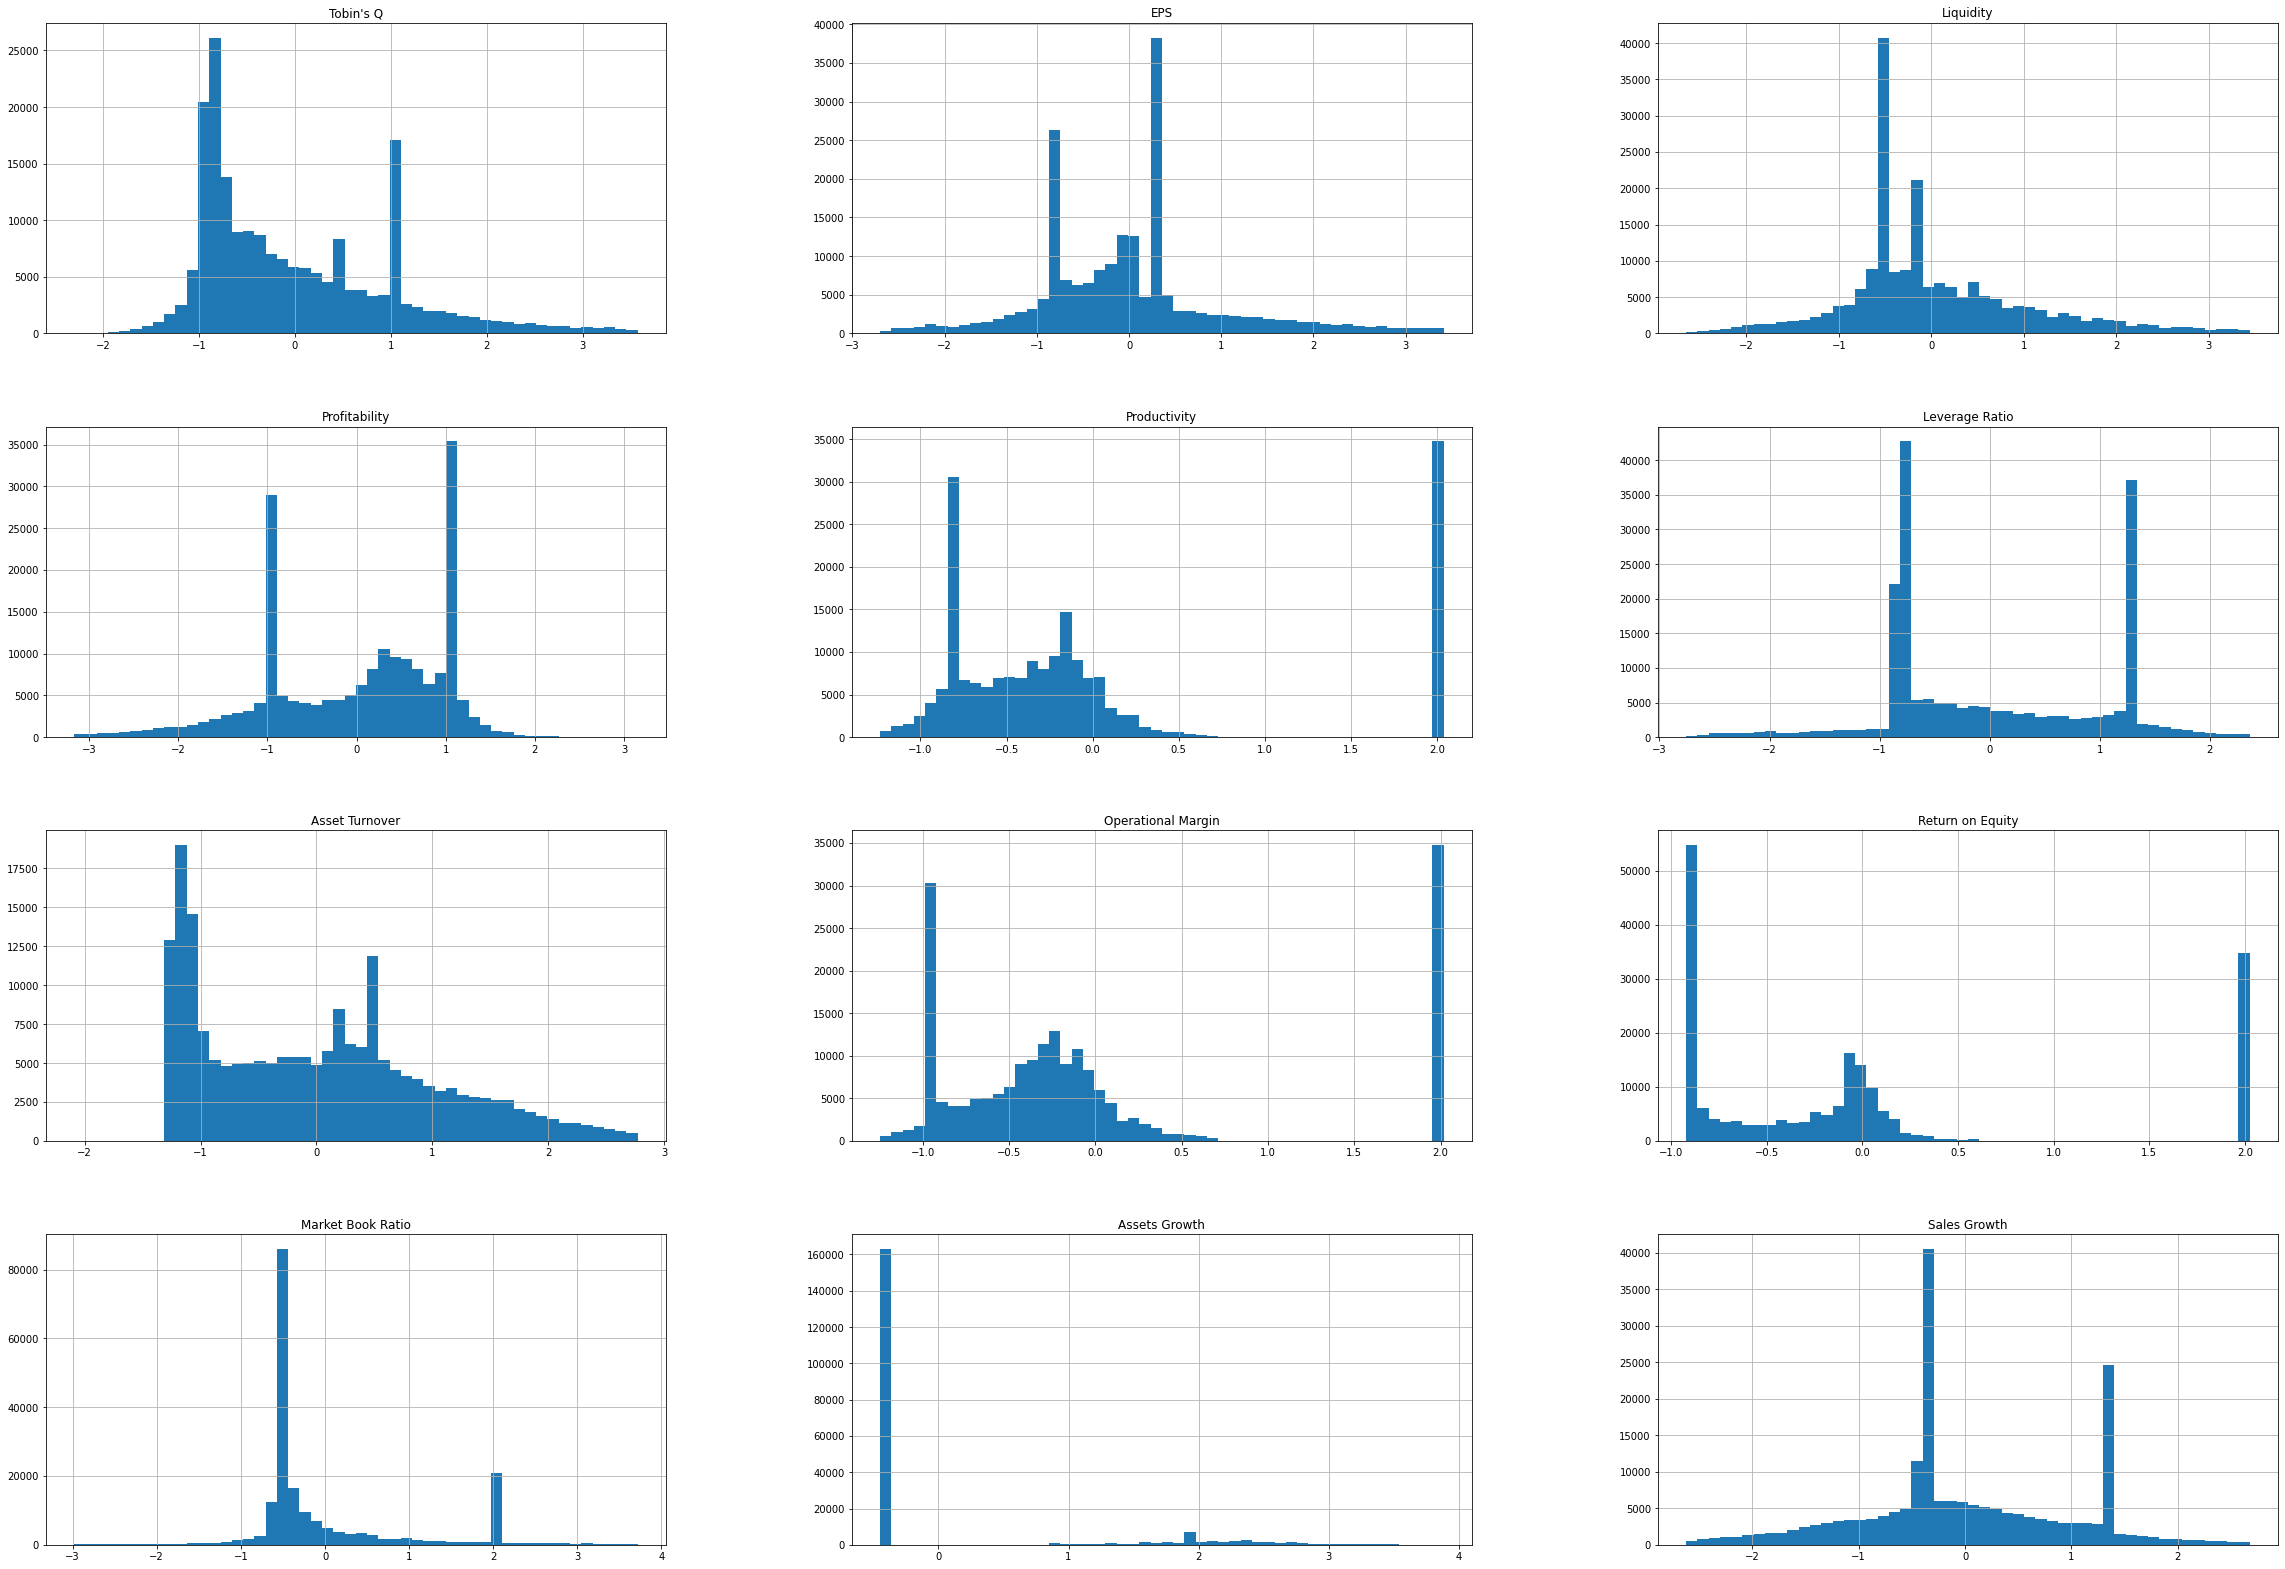

In [ ]:
Standard_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [ ]:
Standard_data_df.describe()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth
count,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05
mean,1.655561e-14,-1.946868e-14,5.373470e-14,-9.732394e-14,1.571159e-15,-1.001470e-14,-1.055622e-14,-2.621055e-14,-2.806625e-15,5.421461e-14,-4.312060e-14,-7.707289e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.300671e+00,-2.700306e+00,-2.654082e+00,-3.169609e+00,-1.234925e+00,-2.758667e+00,-2.091844e+00,-1.247429e+00,-9.225193e-01,-2.983603e+00,-4.497339e-01,-2.625420e+00
25%,-8.179143e-01,-7.550552e-01,-5.675587e-01,-9.591223e-01,-7.432580e-01,-7.969693e-01,-9.862534e-01,-7.042504e-01,-8.669018e-01,-5.533220e-01,-4.497339e-01,-4.599591e-01
50%,-3.036894e-01,-2.088397e-02,-1.881239e-01,2.243754e-01,-2.875739e-01,-3.081096e-01,-5.937314e-02,-2.754934e-01,-1.920196e-01,-4.865631e-01,-4.497339e-01,-2.985642e-01
75%,6.817572e-01,2.683783e-01,4.844102e-01,9.635311e-01,4.575808e-02,1.179635e+00,6.395445e-01,7.580855e-02,6.528623e-02,1.665123e-01,-4.497339e-01,7.659609e-01
max,3.574479e+00,3.411790e+00,3.443560e+00,3.153601e+00,2.039287e+00,2.360969e+00,2.772621e+00,2.017461e+00,2.025827e+00,3.716421e+00,3.884232e+00,2.677825e+00


PAir plot

In [ ]:
ppp = pd.concat([Standard_data_df,y],axis=1)

In [ ]:
ppp

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,-0.956413,0.268604,-0.580952,1.104980,2.043194,-0.797104,-1.141942,2.020953,2.018263,-0.551711,1.716037,-0.320999,1.0
1,-0.891422,0.247222,-0.564107,1.037657,2.042892,-0.797104,-1.178962,2.020957,2.017152,-0.551259,2.207245,-0.321123,1.0
2,-0.713618,0.265176,-0.539330,1.102746,2.042909,-0.797104,-1.260407,2.020976,2.020358,-0.552344,2.715841,-0.320799,1.0
3,-0.961267,0.263772,-0.572276,1.105616,2.042660,-0.797553,-1.137006,2.020924,2.018263,-0.539553,1.672567,-0.321313,1.0
4,-0.990538,0.251088,-0.564079,1.038861,2.042748,-0.797104,-0.996328,2.020952,2.017160,-0.537688,1.946427,-0.321035,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-0.642910,-1.299863,-1.663843,0.153896,-0.457803,1.180643,-0.295011,-0.474210,-0.866327,-0.479637,-0.448756,1.428500,1.0
197768,0.304236,-0.809352,0.095678,-1.069097,-1.036037,-1.028980,0.030381,-0.766073,-0.866327,-0.557321,-0.448756,0.590262,1.0
197769,-0.707597,-0.725504,0.198806,-1.285924,-0.884579,0.350838,-0.634655,-0.954652,-0.866327,-0.486666,-0.448756,-0.742334,1.0
197770,-0.393289,-0.520523,0.098435,-0.644759,-0.788217,0.677340,0.047741,-1.110624,-0.811412,0.395257,-0.448756,1.385381,1.0


In [ ]:
# sns.pairplot(ppp[5:-1],hue='BK')

In [ ]:
# X = df.drop(['BK'],axis=1)

In [ ]:
# y = df['BK']

In [ ]:
X.shape

(197772, 12)

In [ ]:
y.shape

(197772,)

In [ ]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print("Shape after PCA",X_pca.shape)

Shape after PCA (197772, 8)


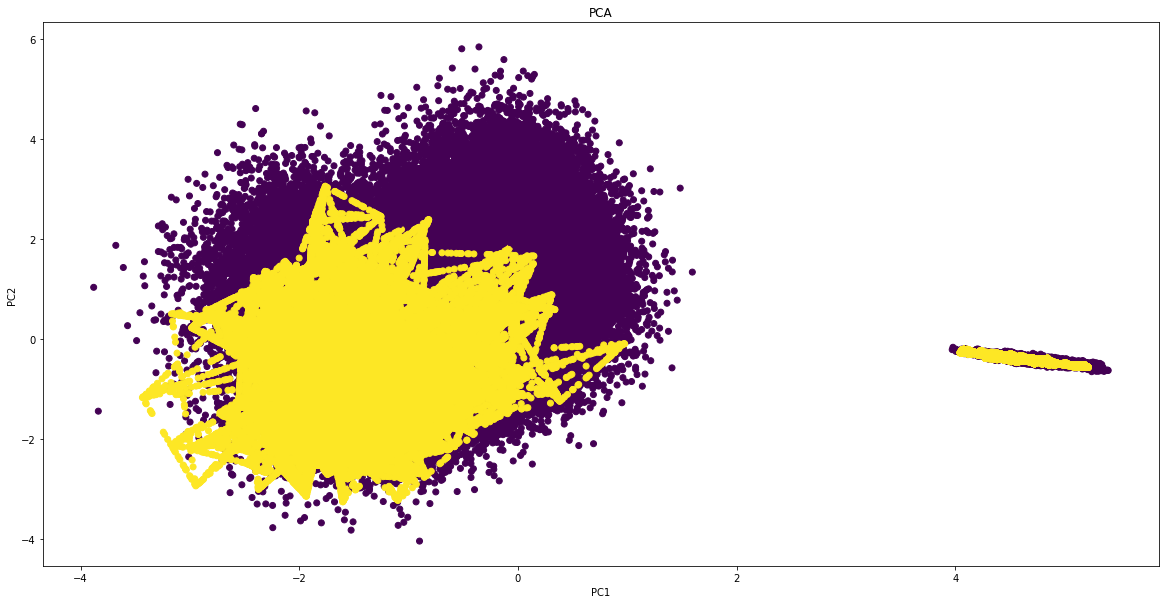

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

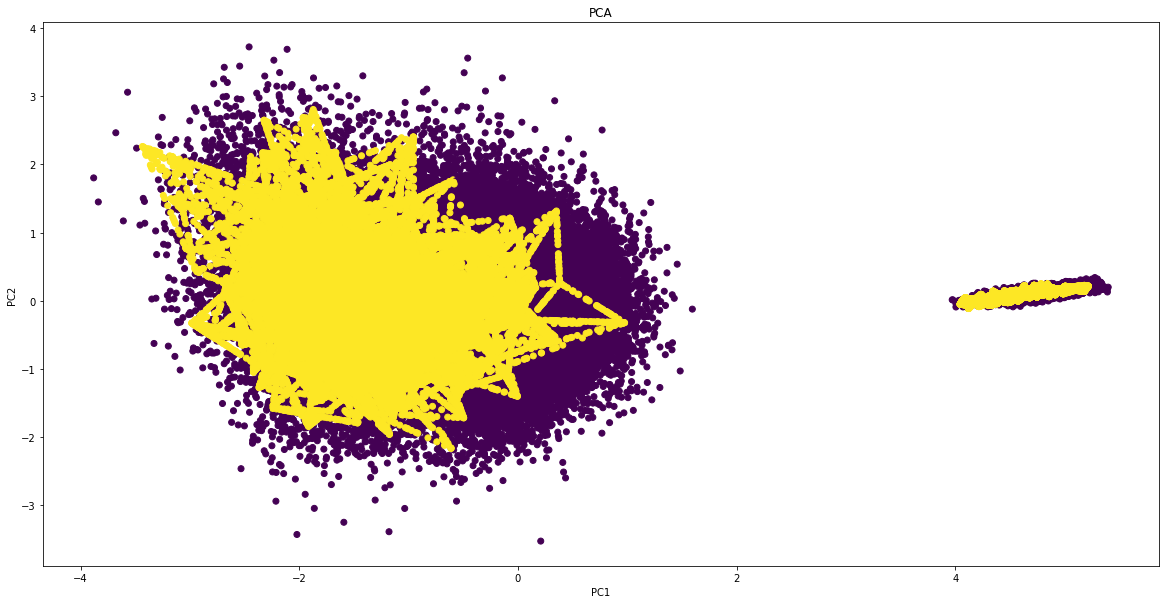

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,-1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [ ]:
X_pca.shape

(197772, 8)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns = ['Column_A','Column_B','Column_C','Column_D','Column_E','Column_F','Column_G','Column_H'])

In [ ]:
df_pca

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H
0,4.457251,-0.390173,0.326684,0.035568,0.003416,0.013737,-0.085524,-0.004748
1,4.629099,-0.434902,0.489250,0.045342,0.026352,0.037878,-0.192028,0.093634
2,4.843412,-0.387182,0.644853,0.066065,0.069762,0.088014,-0.309165,0.244661
3,4.436632,-0.380617,0.316011,0.033044,0.006323,0.001970,-0.085165,-0.015630
4,4.499789,-0.439886,0.313807,-0.009380,-0.001233,0.065061,-0.197086,-0.026347
...,...,...,...,...,...,...,...,...
197767,-1.591625,-0.929445,-0.226724,-1.169925,0.154870,0.101584,-0.015534,0.615536
197768,4.843264,-0.453355,0.570095,0.051557,0.040090,0.066660,-0.295292,0.157979
197769,4.467725,-0.420587,0.337763,0.027189,0.000230,0.022394,-0.104094,-0.010543
197770,-1.913454,1.105973,0.655895,-0.869447,-0.769664,0.268692,-1.079137,2.518311


In [ ]:
final = pd.concat([df_pca,y],axis=1)

In [ ]:
df_pca.describe()

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H
count,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05,1.977720e+05
mean,-5.547129e-16,-3.052000e-15,-1.911426e-15,5.064423e-16,2.939976e-16,-2.862611e-16,-4.195974e-16,3.001894e-16
std,2.240866e+00,1.300851e+00,1.083869e+00,1.050058e+00,9.488667e-01,8.438084e-01,7.192948e-01,6.592258e-01
min,-3.880975e+00,-4.049685e+00,-4.105334e+00,-4.146406e+00,-3.116265e+00,-3.631809e+00,-3.823359e+00,-3.528778e+00
25%,-1.519915e+00,-8.114563e-01,-7.853821e-01,-5.970361e-01,-5.986116e-01,-4.806908e-01,-3.714404e-01,-4.125714e-01
50%,-7.138547e-01,-3.263209e-01,1.440262e-01,2.652146e-02,2.362229e-02,3.600884e-02,-8.611137e-02,4.837422e-02
75%,1.793046e-01,8.140124e-01,5.671909e-01,6.197602e-01,5.396296e-01,3.989938e-01,4.043360e-01,3.313879e-01
max,5.399003e+00,5.842961e+00,4.582333e+00,4.292532e+00,4.058304e+00,4.409205e+00,3.882494e+00,3.724586e+00


In [ ]:
from sklearn.model_selection import train_test_split
X_trai, X_test, y_trai,y_test = train_test_split(df_pca,y,test_size=0.2,random_state = 42)

In [ ]:
X_train, X_val, y_train,y_val = train_test_split(X_trai,y_trai,test_size=0.2,random_state = 42)

In [ ]:
X_val.shape

(31644, 8)

In [ ]:
X_train

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H
170897,-1.826757,-1.872622,-1.183000,0.064133,-1.269277,-0.323945,-1.928523,-0.312645
181726,-1.039598,-1.658735,-1.616029,-0.780283,0.954316,-0.781642,0.352556,0.298051
196406,4.557852,-0.400710,0.478033,0.049948,0.028735,0.042890,-0.165017,0.107841
153380,4.401009,-0.362575,0.323784,0.040951,0.006831,0.012573,-0.065307,0.007195
65432,-0.422117,0.800569,-0.272428,2.181076,-0.264327,-0.190829,-0.494810,-1.519484
...,...,...,...,...,...,...,...,...
97748,-1.072120,-0.978458,-1.066361,-0.622211,-0.211652,-1.112895,-0.449264,0.434203
99412,-0.005576,-0.671591,-1.398471,-0.789045,-0.073492,0.303259,0.229977,-1.402244
102188,-2.177153,-1.017382,-0.172516,-0.736647,-0.832914,-1.167542,-0.836456,0.636835
152645,-1.338964,-1.784050,-0.699109,-0.163039,0.847487,0.010067,0.024087,0.414154


In [ ]:
y_train

170897    1.0
181726    1.0
196406    1.0
153380    1.0
65432     0.0
         ... 
97748     0.0
99412     1.0
102188    1.0
152645    1.0
132881    1.0
Name: BK, Length: 126573, dtype: float64

In [ ]:
X_val

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H
6671,4.650153,-0.402211,0.368652,-0.047314,0.030092,0.199729,-0.409893,0.074654
95579,0.286258,1.578721,-1.107613,-0.306668,-1.898374,0.225631,0.907054,-0.341875
127269,-1.025039,-0.818183,-0.637381,0.244049,0.063455,-0.490467,0.264490,0.646859
99168,-0.266512,0.802750,-0.869041,1.765276,-1.236993,0.067223,1.534531,0.934426
29939,-0.552223,0.054809,-1.069005,1.044613,-2.321899,-0.300215,-0.330341,0.330643
...,...,...,...,...,...,...,...,...
165520,-0.840843,-0.801581,1.021609,-1.262711,1.445372,2.040009,1.184131,-1.300577
80612,-1.732855,2.397312,1.711167,-1.194392,1.174872,-2.570799,-0.156943,0.517880
71623,-1.437727,-0.424934,2.501922,1.091319,-0.984285,2.993427,1.254893,0.248812
3673,4.776730,-0.357678,0.453683,-0.044193,0.048675,0.201649,-0.460124,0.171943


In [ ]:
y_val

6671      0.0
95579     0.0
127269    1.0
99168     0.0
29939     0.0
         ... 
165520    1.0
80612     0.0
71623     0.0
3673      0.0
153343    1.0
Name: BK, Length: 31644, dtype: float64

In [ ]:
X_test

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H
93214,-1.789548,0.275725,1.664072,-2.165193,-0.180935,-2.769037,0.579633,0.755259
116593,-1.201819,0.903778,-0.566784,1.716457,0.122839,-0.743594,-0.853820,-0.224892
176433,-1.196602,-2.144890,-0.326817,0.355597,1.092606,-0.175443,0.020468,0.320030
91717,-2.792426,0.879082,0.973154,1.801553,-0.045621,-0.488622,-0.865805,0.479963
78235,-1.236937,1.988896,1.464165,-1.489034,-1.457382,-2.131994,0.308510,0.600389
...,...,...,...,...,...,...,...,...
6427,4.763802,-0.431151,0.454743,0.006812,0.000196,-0.015282,-0.238084,0.097868
66941,-1.808439,-0.442107,1.048884,-0.972692,0.626936,0.905547,0.172854,-0.065209
157294,4.469369,-0.368988,0.366541,0.037771,0.005931,-0.020351,-0.080268,0.035918
182171,-1.812772,1.544736,1.851488,1.379463,0.129680,-0.343067,0.036613,-0.948082


In [ ]:
y_test

93214     0.0
116593    1.0
176433    1.0
91717     0.0
78235     0.0
         ... 
6427      0.0
66941     0.0
157294    1.0
182171    1.0
155254    1.0
Name: BK, Length: 39555, dtype: float64

## Randomized Search CSV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,7,8,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 8, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


## Random Forest

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
rf_randomized = RandomizedSearchCV(estimator=random_classifier,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1577; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=2000; total time=   0.6s
[CV] END criterion=gini, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=944; total time=   0.3s
[CV] END criterion=gini, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=944; total time=   0.4s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=  34.8s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=522; total time=   0.2s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 8,
                                                              9],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=2000; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=2000; total time=   0.6s
[CV] END criterion=gini, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=944; total time=   0.3s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=  34.9s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=  35.1s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=  34.7s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=  46.9s
[CV] END criterion=gini, max_depth

In [ ]:
# random_classifier.fit(X_train,y_train)
rf_randomized.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [ ]:
rf_randomized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       min_samples_split=7)

In [ ]:
best_random_grid = rf_randomized.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18968   760]
 [   71 19756]]
Accuracy Score 0.9789912779673872
Classification report:               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     19728
         1.0       0.96      1.00      0.98     19827

    accuracy                           0.98     39555
   macro avg       0.98      0.98      0.98     39555
weighted avg       0.98      0.98      0.98     39555



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':[rf_randomized.best_params_['criterion']],
    'max_depth' :[rf_randomized.best_params_['max_depth']],
    'max_features':[rf_randomized.best_params_['max_features']],
    'min_samples_leaf':[rf_randomized.best_params_['min_samples_leaf'],
                       rf_randomized.best_params_['min_samples_leaf']+2,
                       rf_randomized.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomized.best_params_['min_samples_split']-2,
                         rf_randomized.best_params_['min_samples_split']-1,
                         rf_randomized.best_params_['min_samples_split'],
                         rf_randomized.best_params_['min_samples_split']+2,
                         rf_randomized.best_params_['min_samples_split']+1],
    'n_estimators':[rf_randomized.best_params_['n_estimators']-200,rf_randomized.best_params_['n_estimators']-100,
                  rf_randomized.best_params_['n_estimators'],rf_randomized.best_params_['n_estimators']+200
                  ,rf_randomized.best_params_['n_estimators']+100]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [5, 6, 7, 9, 8], 'n_estimators': [-100, 0, 100, 300, 200]}


In [ ]:
#Grid Search
rf = RandomForestClassifier()
grid_search=GridSearchCV(estimator = rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 6, 7, 9, 8],
                         'n_estimators': [-100, 0, 100, 300, 200]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       min_samples_split=5, n_estimators=300)

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       min_samples_split=5, n_estimators=300)

In [ ]:
#Final Model for Random forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# xx = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
#                        min_samples_split=5, n_estimators=300)
xx = RandomForestClassifier(max_depth = 12)

In [ ]:
xx.fit(X_train,y_train)

RandomForestClassifier(max_depth=12)

In [ ]:
y_pred = xx.predict(X_test)
# RandomForestClassifier(criterion='entropy', max_depth=560,10-92%, max_features='sqrt',
#                        min_samples_split=5, n_estimators=300)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

[[17816  1912]
 [  283 19544]]
Accuracy Score 0.9445076475793199
Classification reportL               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94     19728
         1.0       0.91      0.99      0.95     19827

    accuracy                           0.94     39555
   macro avg       0.95      0.94      0.94     39555
weighted avg       0.95      0.94      0.94     39555



In [ ]:
accuracy_score(xx.predict(X_train),y_train)
#accuracy_score(Y_trainn, xgb.predict(X_trainn))

0.9538369162459608

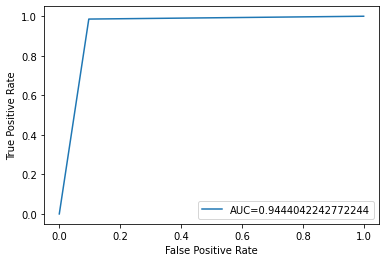

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

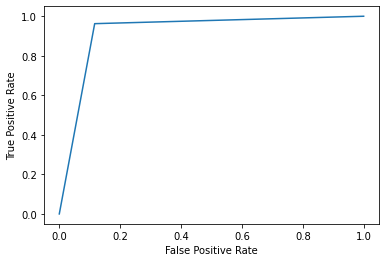

In [ ]:
sfrom sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print('AUC: {}'.format(auc_score))

AUC: 0.9195392103373008


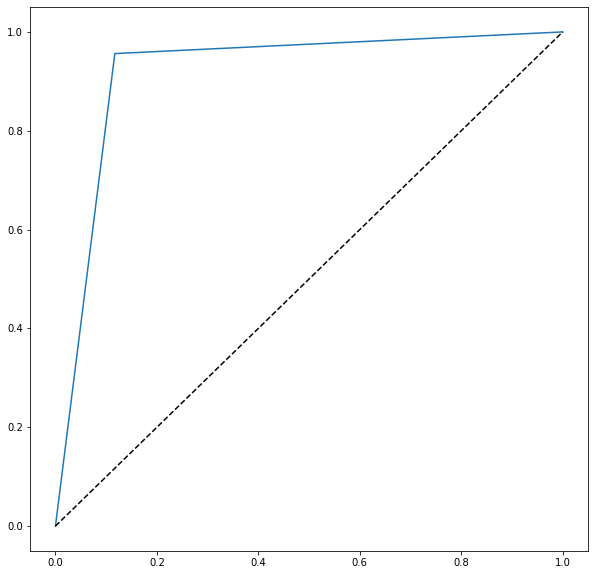

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17418  2310]
 [  869 18958]]


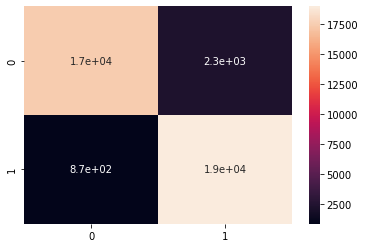

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
#optional ends

In [ ]:
#Accuracy score, Classification report

In [ ]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

[[19013   715]
 [   57 19770]]
Accuracy Score 0.9804828719504487
Classification reportL               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     19728
         1.0       0.97      1.00      0.98     19827

    accuracy                           0.98     39555
   macro avg       0.98      0.98      0.98     39555
weighted avg       0.98      0.98      0.98     39555

[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 1.7min
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=200; total time= 1.1min
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=  33.5s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=-100; total time=   0.0s
[CV] END criterion=entro

[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=-100; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  33.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time= 1.6min
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=300; total time= 1.6min
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time= 1.6min
[CV] END criterion=entr

[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=-100; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=-100; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=  32.8s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300; total time= 1.6min
[CV] END criterion=ent

In [ ]:
accuracy_score(y_train,best_grid.predict(x_train))

In [ ]:
#over

In [ ]:
y_pred = random_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[19027   701]
 [   65 19762]]


0.9806345594741499

In [ ]:
# random_classifier.score(X_test,y_test)

0.9806345594741499

## KNN

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
kk = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
kk.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kk.predict(X_test)
# kk.score(X_test,y_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[17943    15]
 [ 1785 19812]]


0.9544937428896473

##Logistic Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)


In [ ]:
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = LR.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[15256  2655]
 [ 4472 17172]]


0.8198205030969536

ok
